In [1]:
 #  A Whale off the Port(folio)

"In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index."

"In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index."

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whales_data=Path("./Resources/whale_returns.csv")
whales_returns = pd.read_csv(whales_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whales_returns.sort_index(inplace=True)
whales_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whales_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whales_returns=whales_returns.dropna()
whales_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
whales_returns.isnull().sum() #verified that all nulls have been dropped

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_data=Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns=algo_returns.dropna()

In [10]:
algo_returns.isnull().sum() #verifing that the data was dropped

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_data=Path("./Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500['Close']=sp500['Close'].str.replace('$', '').astype('float')

In [15]:
# Calculate Daily Returns
sp500_returns = sp500.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Drop nulls
sp500_returns=sp500_returns.dropna(axis=0)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns=sp500_returns.rename(columns={'Close': 'SP500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whales_returns, algo_returns, sp500_returns], axis= "columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

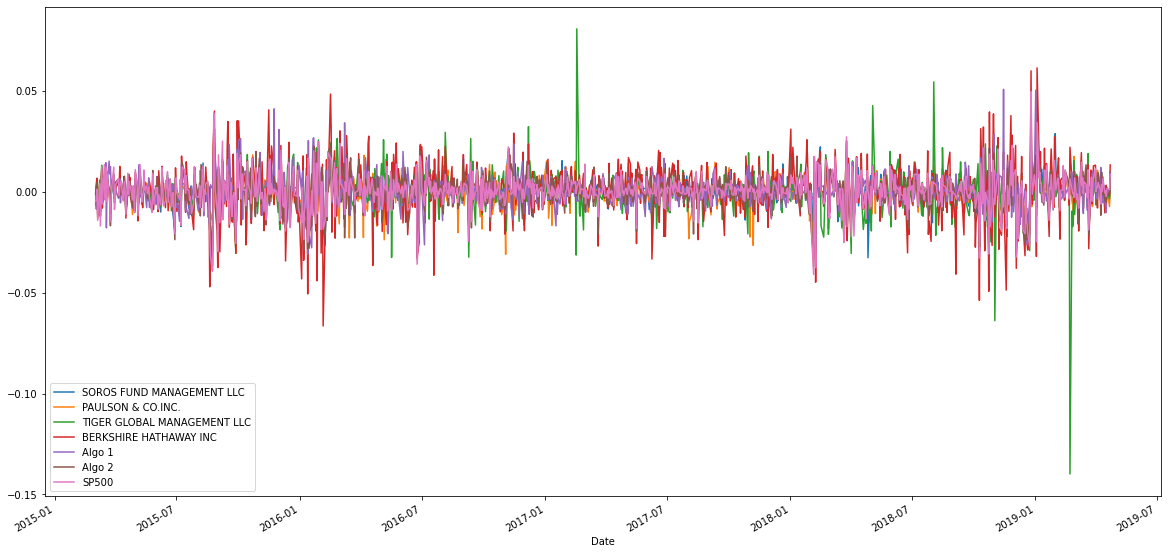

In [19]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


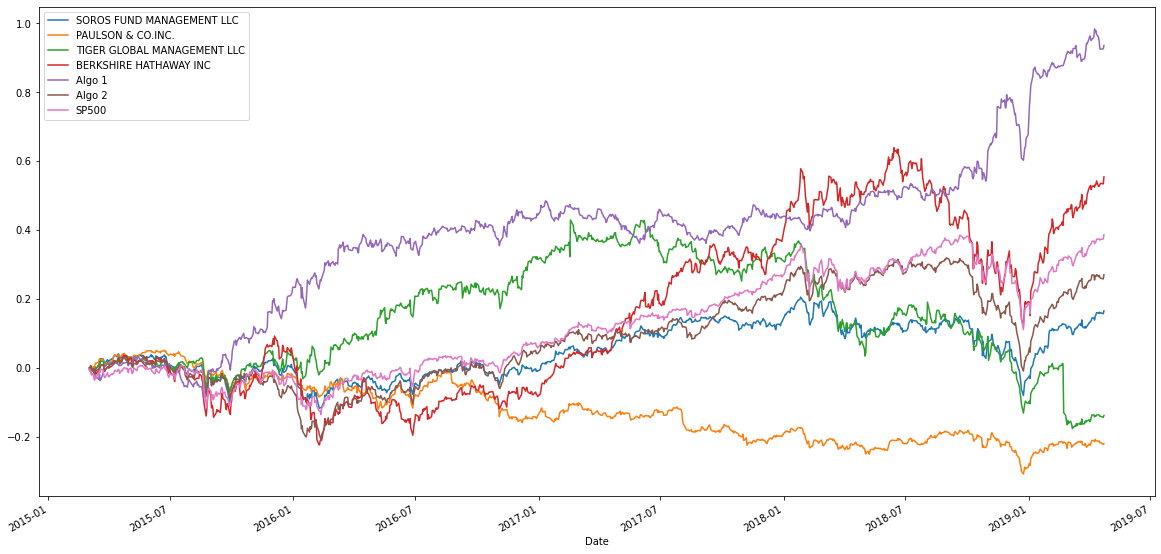

In [20]:
# Calculate cumulative returns of all portfolios #cumlative gives you (cum=any return on a day day from first day)
cum_returns=(1+combined_df).cumprod()-1
# Plot cumulative returns
cum_returns.plot(figsize=(20,10))
cum_returns.head()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

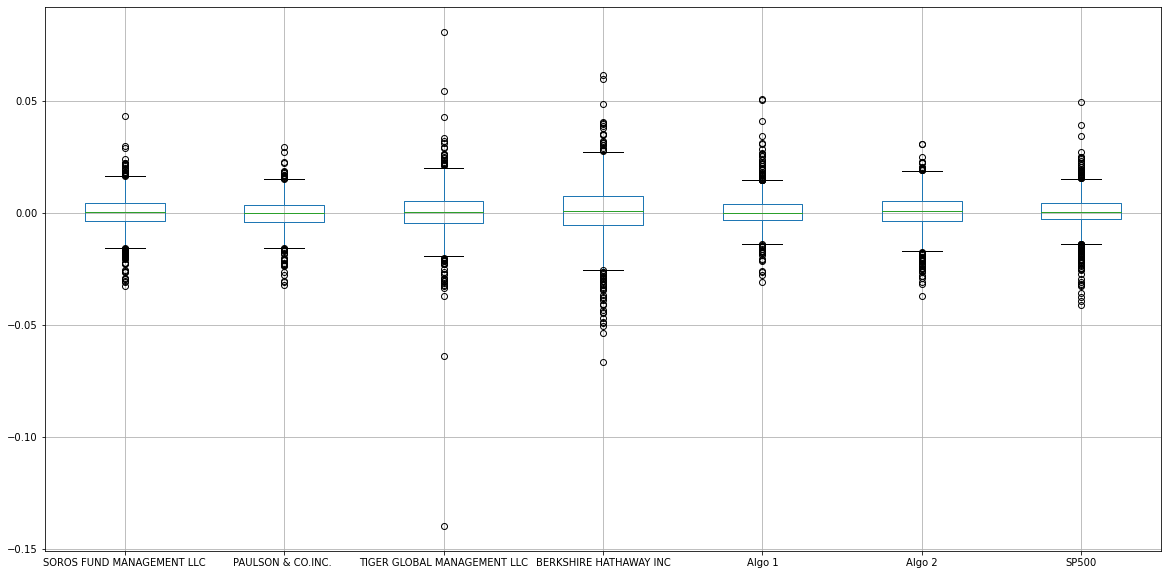

In [21]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))


### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios #STD: .007023 means that at any given time it can change at .7% vs. .0129 means it can change 1.29%
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500



In [23]:
# Calculate  the daily standard deviation of S&P 500
sp_std=combined_df['SP500'].std()

# Determine which portfolios are riskier than the S&P 500
combined_df.std()>sp_std


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

In [24]:
print("Both Tiger Global Management LLC and Berkshire Hathawway INC are riskier than the S&P 500.")

Both Tiger Global Management LLC and Berkshire Hathawway INC are riskier than the S&P 500.


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annual_volatility= combined_df.std()*np.sqrt(252)
annual_volatility.sort_values(inplace=True)
annual_volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

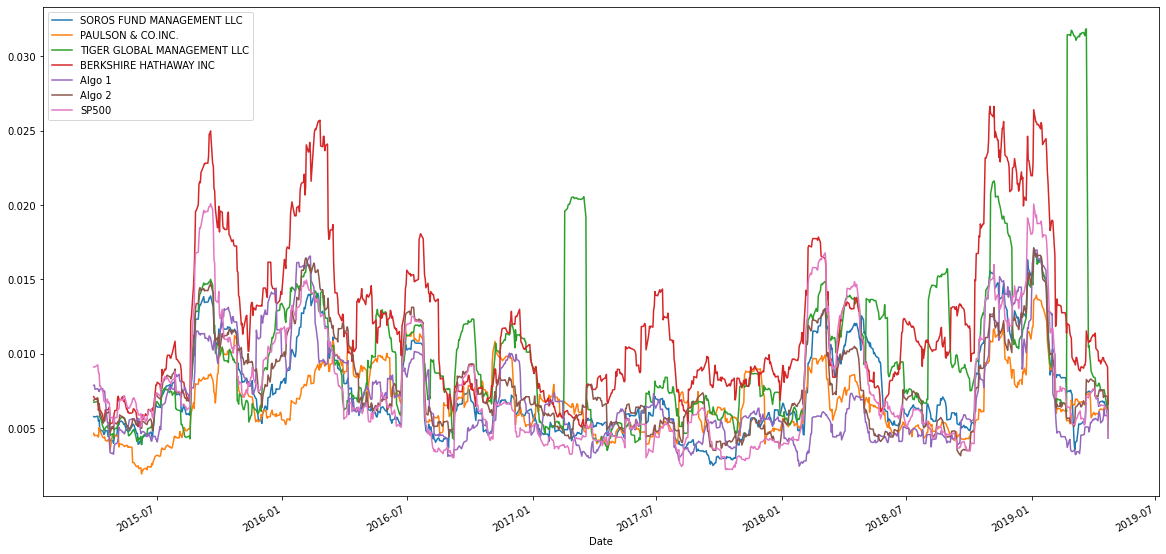

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
correlation=combined_df.corr()
# Display de correlation matrix
correlation
correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
combined_df.cov()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,0.000062,0.000039,0.000048,0.000077,0.000019,0.000054,0.000057
PAULSON & CO.INC.,0.000039,0.000049,0.000033,0.000050,0.000014,0.000040,0.000040
TIGER GLOBAL MANAGEMENT LLC,0.000048,0.000033,0.000119,0.000060,0.000014,0.000046,0.000058
BERKSHIRE HATHAWAY INC,0.000077,0.000050,0.000060,0.000167,0.000029,0.000074,0.000083
Algo 1,0.000019,0.000014,0.000014,0.000029,0.000058,0.000018,0.000018
Algo 2,0.000054,0.000040,0.000046,0.000074,0.000018,0.000070,0.000061
SP500,0.000057,0.000040,0.000058,0.000083,0.000018,0.000061,0.000073


<AxesSubplot:title={'center':'BETA'}, xlabel='Date'>

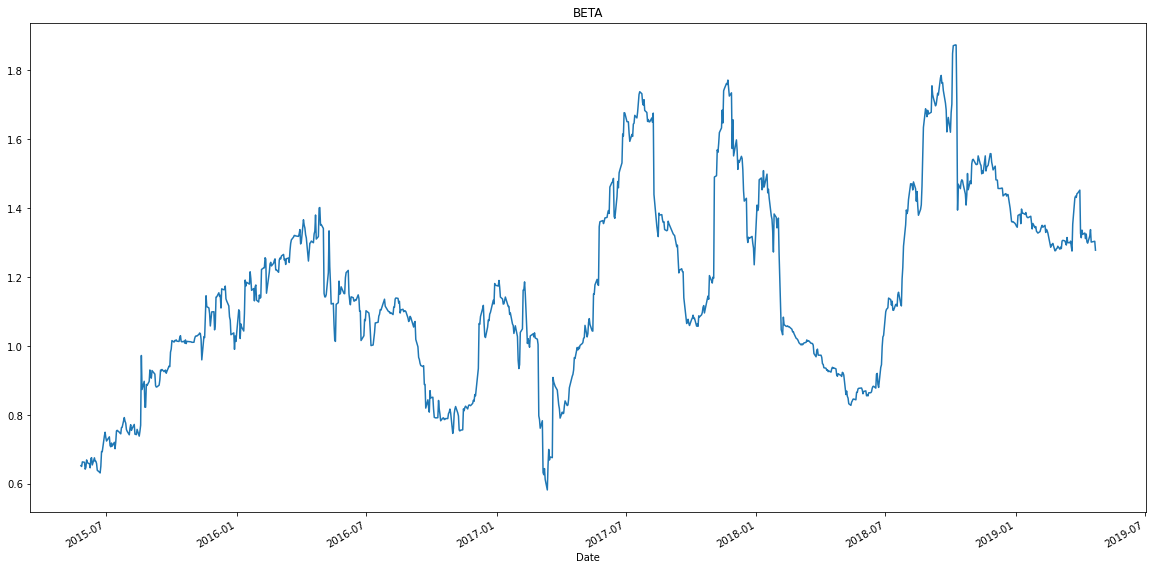

In [29]:
# Calculate covariance of a single portfolio
covariance=combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP500'])

# Calculate variance of S&P 500
variance=combined_df['SP500'].rolling(window=60).var()

# Computing beta

beta=covariance/variance
beta
# Plot beta trend
beta.plot(figsize=(20,10), title='BETA')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [30]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21)


ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratio=(cum_returns.mean()* 252)/(cum_returns.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      10.800652
PAULSON & CO.INC.             -22.246513
TIGER GLOBAL MANAGEMENT LLC    15.675541
BERKSHIRE HATHAWAY INC         10.488981
Algo 1                         26.584386
Algo 2                         10.480419
SP500                          13.578149
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

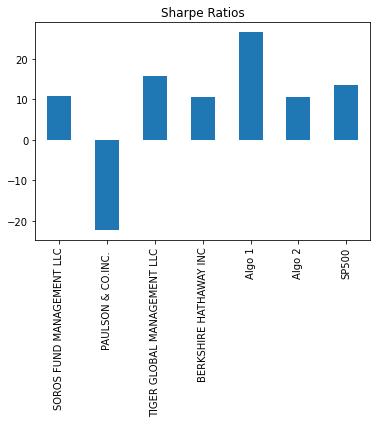

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
 
Algo 1 was the only one that was able to out-perform SP500 by having the most returns. Secondly Tiger Global, and then the other three, not including Paulson were similiarly next in their returns. Paulson actually did not have excess returns and was below the risk-free ratio, mkiknig it very risky. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [33]:
# Reading data from 1st stock
goog_data=Path("./Resources/goog_historical.csv")
goog_returns = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_returns.sort_index(inplace=True)
goog_returns.head()

goog_returns=goog_returns.rename(columns={"NOCP":"GOOG"}).drop(columns='Symbol')
goog_returns

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
...,...
2019-05-03,1185.40
2019-05-06,1189.39
2019-05-07,1174.10


In [34]:
# Reading data from 2nd stock
aapl_data=Path("./Resources/aapl_historical.csv")
aapl_returns = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_returns.sort_index(inplace=True)
aapl_returns.head()

aapl_returns=aapl_returns.rename(columns={"NOCP":"AAPL"}).drop(columns='Symbol')
aapl_returns

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
...,...
2019-05-03,211.75
2019-05-06,208.48
2019-05-07,202.86


In [35]:
# Reading data from 3rd stock
cost_data=Path("./Resources/cost_historical.csv")
cost_returns = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_returns.sort_index(inplace=True)
cost_returns.head()

cost_returns=cost_returns.rename(columns={"NOCP":"COST"}).drop(columns='Symbol')
cost_returns

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [36]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([goog_returns, aapl_returns, cost_returns], axis= "columns", join="inner")
combined_stocks.sort_index(inplace=True)
combined_stocks.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [37]:
# Reset Date index
combined_stocks.reset_index()

,Trade DATE,GOOG,AAPL,COST
0,2018-05-11,1098.26,188.59,195.76
1,2018-05-14,1100.20,188.15,195.88
2,2018-05-15,1079.23,186.44,195.48
3,2018-05-16,1081.77,188.18,198.71
4,2018-05-17,1078.59,186.99,199.60
...,...,...,...,...
245,2019-05-03,1185.40,211.75,244.62
246,2019-05-06,1189.39,208.48,244.23
247,2019-05-07,1174.10,202.86,240.18
248,2019-05-08,1166.27,202.90,241.34


In [38]:
# Reorganize portfolio data by having a column per symbol
combined_stocks

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [39]:
# Calculate daily returns
#combined_stocks=combined_stocks.dropna()
combined_stocks=combined_stocks.pct_change().dropna()
# Drop NAs
#combined_stocks=combined_stocks.pct_change().dropna() <-- did it above 
# Display sample data
combined_stocks

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


In [40]:
# Display sample data
combined_stocks.isnull().sum() # verifies that nulls have been dropped

GOOG    0
AAPL    0
COST    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights #.3/.3/.3 #want them to be between 0-1`
weight=[.33,.33,.34]

print(sum(weight)) #checks that weight is equal to 1

# Calculate portfolio return
weighted_returns = (weight*combined_stocks)

# Display sample data
print(weighted_returns.head())

1.0
                GOOG      AAPL      COST
Trade DATE                              
2018-05-14  0.000583 -0.000770  0.000208
2018-05-15 -0.006290 -0.002999 -0.000694
2018-05-16  0.000777  0.003080  0.005618
2018-05-17 -0.000970 -0.002087  0.001523
2018-05-18 -0.003742 -0.001200 -0.001090


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
combined_stocks2 = pd.concat([combined_stocks, combined_df], axis= "columns", join="inner")
combined_stocks2.sort_index(inplace=True)
combined_stocks2.head()

,GOOG,AAPL,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.001766,-0.002333,0.000613,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.019060,-0.009088,-0.002042,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.002354,0.009333,0.016523,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002940,-0.006324,0.004479,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.011339,-0.003637,-0.003206,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_stocks2.isnull().sum() #No NaNs to drop

GOOG                           0
AAPL                           0
COST                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
annual_std= combined_stocks2.std()*np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
SP500                          0.152054
COST                           0.212034
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
GOOG                           0.255500
AAPL                           0.296951
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

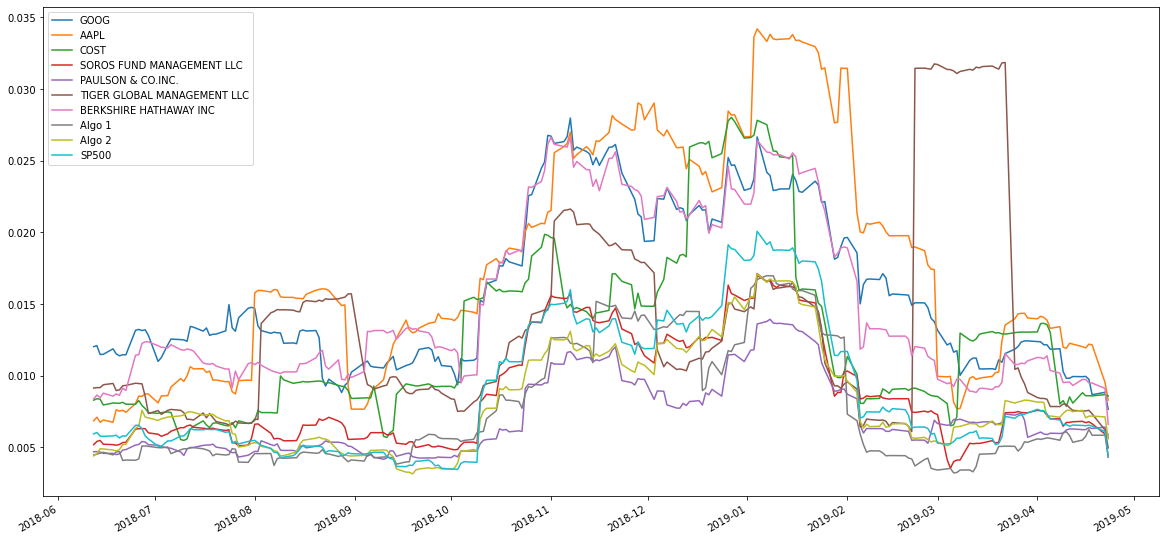

In [45]:
# Calculate rolling standard deviation
combined_stocks2.rolling(window=21).std().plot(figsize=(20,10))

# Plot rolling standard deviation
#combined_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

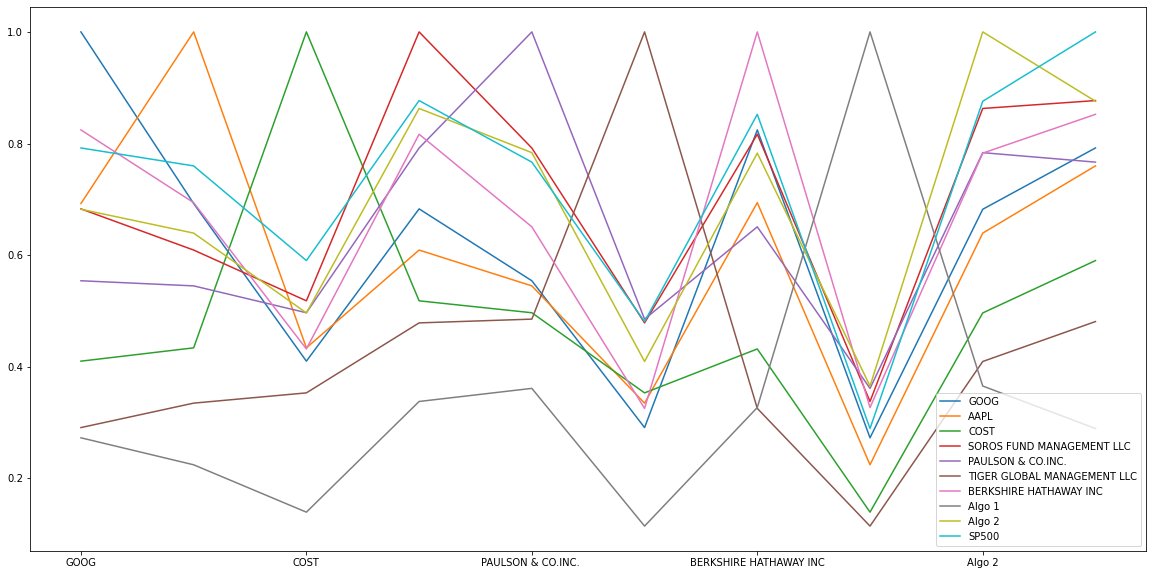

In [46]:
# Calculate and plot the correlations
correlation=combined_stocks2.corr()
correlation.plot(figsize=(20,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'BETA'}>

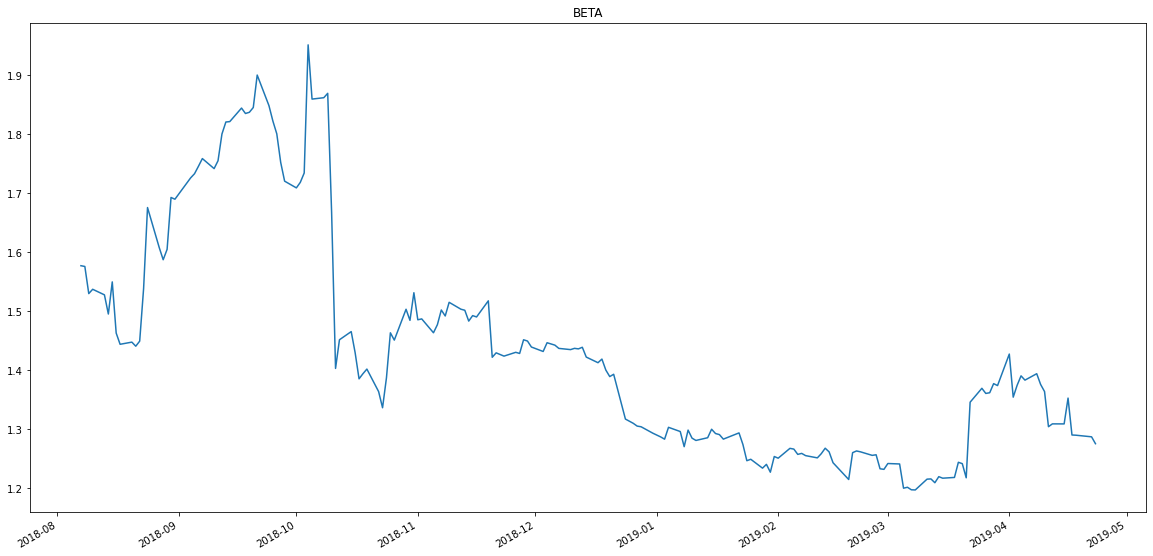

In [54]:
# Calculate and plot Beta

# Calculate covariance of a single portfolio
covariance2=combined_stocks2['GOOG'].rolling(window=60).cov(combined_df['SP500'])
# covariance
# Calculate variance of S&P 500
variance=combined_df['SP500'].rolling(window=60).var()

# Computing beta

beta2=covariance2/variance
beta2
# Plot beta trend
beta2.plot(figsize=(20,10), title='BETA')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Calculate Annualzied Sharpe Ratios
daily_returns=combined_stocks2
sharpe_ratio=(daily_returns.mean()* 252)/(daily_returns.std()*np.sqrt(252))
sharpe_ratio

GOOG                           0.714034
AAPL                           0.490850
COST                           1.244419
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

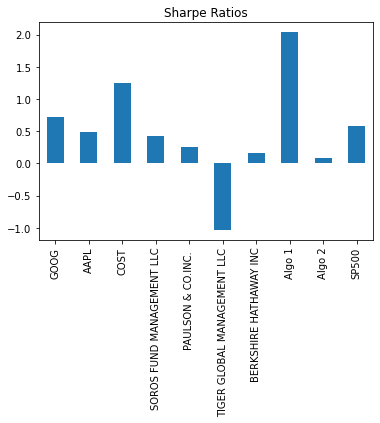

In [49]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [50]:
f'The higher the Sharpe Ratio, the better the returns, therefore both Google and Costco did better than SP500, but not has well as the Algo 1. Tiger Global Management had a negative Sharpe Ratio, which shows that no excess funds were produced.'

'The higher the Sharpe Ratio, the better the returns, therefore both Google and Costco did better than SP500, but not has well as the Algo 1. Tiger Global Management had a negative Sharpe Ratio, which shows that no excess funds were produced.'